<a href="https://colab.research.google.com/github/yernarknayatov/deep_learning_cv/blob/main/%D2%9A%D0%BD%D0%B0%D1%8F%D1%82%D0%BE%D0%B2_%D0%95%D1%80%D0%BD%D0%B0%D1%80_task_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
from torch import nn
from torch import functional as F
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from torch.utils.data import TensorDataset,Dataset, DataLoader
import torch.utils.data as data_utils
import torch
from torch import nn
from torch import functional as F
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import tqdm

In [2]:
df = pd.read_csv('heart.csv', sep = ',')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.shape

(303, 14)

In [5]:
feature_columns = ['age', 'sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal']
target_column = 'target'

In [6]:
train, test = train_test_split(df, test_size=0.2, random_state=23)

In [7]:
X = np.array(df[feature_columns])
# Extract target
y = np.array(df[target_column])

# encode target with target_mapping
y = np.array(df[target_column])

In [8]:
X_mean = np.mean(X, axis = 0)
X_std = np.std(X, axis = 0)
X = np.array((X - X_mean)/X_std)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=15)

In [10]:
X_train = torch.FloatTensor(X_train)
y_train = torch.FloatTensor(y_train)
X_test = torch.FloatTensor(X_test)
y_test = torch.FloatTensor(y_test)

In [11]:
batch_size = 15

In [12]:
dataset =TensorDataset(X_train, y_train)
train_loader = DataLoader(dataset, batch_size, shuffle = False)

In [13]:
testset =TensorDataset(X_test, y_test)
test_loader = DataLoader(testset, batch_size, shuffle = False)

In [14]:
for x,y in train_loader:
    # Print the 'text' data of the batch
    print(x)
    print(y)
    print('------------------')
    break

tensor([[ 0.5110,  0.6810,  1.9731,  1.6206,  0.5167, -0.4176, -1.0058, -1.0778,
         -0.6966, -0.8969,  0.9764, -0.7144, -0.5129],
        [-0.1507,  0.6810,  1.0026, -0.0927, -0.0051,  2.3944, -1.0058,  1.0212,
         -0.6966, -0.8969,  0.9764,  2.2241, -0.5129],
        [-1.4742,  0.6810, -0.9385, -1.2350, -1.4352, -0.4176, -1.0058,  0.3653,
         -0.6966, -0.8969,  0.9764, -0.7144,  1.1230],
        [ 0.6213,  0.6810, -0.9385, -0.0927,  0.1302, -0.4176,  0.8990, -0.2469,
          1.4355,  0.3109,  0.9764,  0.2651,  1.1230],
        [ 0.5110,  0.6810, -0.9385,  0.1928, -0.2370, -0.4176,  0.8990,  0.4965,
         -0.6966, -0.4655, -0.6491, -0.7144,  1.1230],
        [-1.8050,  0.6810,  1.9731, -0.6639, -0.2950, -0.4176,  0.8990,  1.4148,
          1.4355,  2.3814, -0.6491, -0.7144,  1.1230],
        [-1.4742,  0.6810,  1.0026, -1.1208,  0.0722, -0.4176,  0.8990,  1.2836,
         -0.6966, -0.8969,  0.9764, -0.7144, -0.5129],
        [-1.5844,  0.6810,  1.9731,  0.4784, -0.

In [15]:
#Write your own model and correct mistakes if they are
torch.manual_seed(42) 
np.random.seed(42)
model = nn.Sequential(
    torch.nn.Linear(13, 40),
    # torch.nn.LeakyReLU(),
    torch.nn.Linear(40, 20),
    # torch.nn.LeakyReLU(),
    torch.nn.Linear(20, 5),
    # torch.nn.LeakyReLU(),
    torch.nn.Linear(5, 1),
    torch.nn.Sigmoid(),
)
    
loss_fn = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.2)
num_epoch = 10

In [16]:
train_losses = []
test_losses = []
learning_rate = 1e-4

for i in range(num_epoch):
    model.train(True)
    epoch_train_losses = []
    
    for X_batch, y_batch in train_loader:
        y_pred = model(X_batch)
        loss = loss_fn(y_pred.squeeze().squeeze(), y_batch.squeeze())
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        epoch_train_losses.append(loss.item())              
    train_losses.append(np.mean(epoch_train_losses))
    model.train(False)
    with torch.no_grad():
      #add code for validation set
      for X_batch, y_batch in test_loader:
            y_pred = model(X_batch)
            loss = loss_fn(y_pred.squeeze().squeeze(), y_batch.squeeze())
      test_losses.append(loss.item())
    if i%20 == 0:
        print(i, 'train loss ',np.mean(epoch_train_losses), ' val loss ',np.mean(test_losses))

0 train loss  0.21589575970874114  val loss  0.02895982936024666


In [17]:
train_losses

[0.21589575970874114,
 0.14611228949883404,
 0.12214361109277781,
 0.11437440663576126,
 0.11055793919984032,
 0.10848473187755137,
 0.10722540056004244,
 0.10638152271070901,
 0.1057793786201407,
 0.10533233162234812]

In [18]:

test_losses

[0.02895982936024666,
 0.0007139047957025468,
 5.5520442401757464e-05,
 9.0663825176307e-06,
 2.2389240257325582e-06,
 7.373349149020214e-07,
 2.966636145629309e-07,
 1.367679800523547e-07,
 6.923168172079386e-08,
 3.746198018461655e-08]

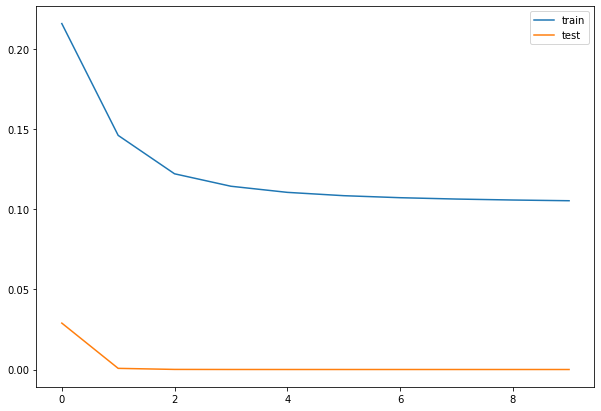

In [19]:
#print both train and test losses on one graph 
plt.figure(figsize=(10,7))
plt.plot(range(len(train_losses)), train_losses, label='train')
plt.plot(range(len(test_losses)), test_losses, label='test')
plt.legend()
plt.show()

In [20]:
y_pred = model.forward(X_test)

In [21]:
y_pred = np.round(y_pred.detach().numpy())

In [22]:
#show your results 
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[24  4]
 [ 7 26]]
              precision    recall  f1-score   support

         0.0       0.77      0.86      0.81        28
         1.0       0.87      0.79      0.83        33

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



Theoretical part: 
<br>1) Describe several metrics applied for image segmentation task 
<br>2)Describe difference between semantic and instance segmentation  

1. DICE Intuitively, a successful prediction is one which maximizes the overlap between the predicted and true objects. 
Dice Coefficient is 2 * the Area of Overlap divided by the total number of pixels in both images.

2. Semantic segmentation treats multiple objects within a single category as one entity. Instance segmentation, on the other hand, identifies individual objects within these categories.